In [1]:
import pandas as pd
import numpy as np

import os

In [2]:
os.getcwd()

'C:\\Users\\hanne\\dengue-predict\\src\\jupyter-notbooks'

In [9]:
cd C:\Users\hanne\dengue-predict

C:\Users\hanne\dengue-predict


In [10]:
train_labels = pd.read_csv('data/dengue_labels_train.csv')

In [11]:
train_labels.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [12]:
train = pd.read_csv('data/dengue_features_train.csv')

In [13]:
train = train.merge(train_labels, on=['city','year','weekofyear'], how='left')
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [14]:
train.groupby('city')['year'].value_counts()

city  year
iq    2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    52
      2009    52
      2000    26
      2010    26
sj    1991    52
      1992    52
      1993    52
      1994    52
      1995    52
      1996    52
      1997    52
      1998    52
      1999    52
      2000    52
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      1990    35
      2008    17
Name: year, dtype: int64

In [15]:
test = pd.read_csv('data/dengue_features_test.csv')

In [16]:
test.groupby('city')['year'].value_counts()

city  year
iq    2011    52
      2012    52
      2010    26
      2013    26
sj    2009    52
      2010    52
      2011    52
      2012    52
      2008    35
      2013    17
Name: year, dtype: int64

<AxesSubplot:ylabel='Frequency'>

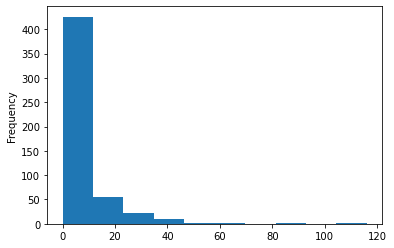

In [17]:
train_labels[train_labels.city=='iq'].total_cases.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

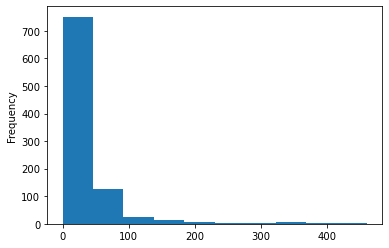

In [18]:
train_labels[train_labels.city=='sj'].total_cases.plot(kind='hist')

<AxesSubplot:>

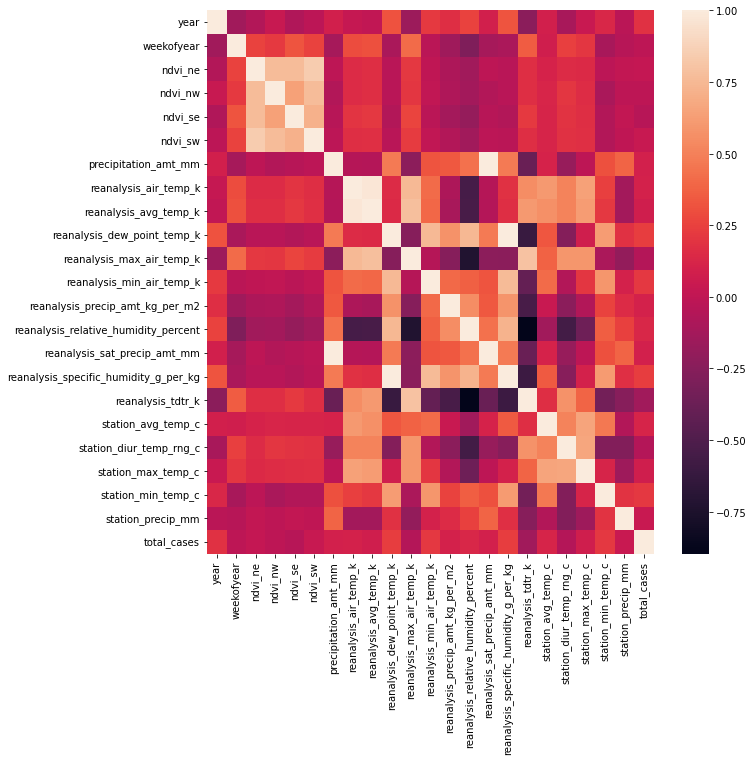

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(train.corr(), ax=ax)

In [20]:
import itertools

In [21]:

for (c1, c2) in itertools.combinations(train.corr().columns, 2):
        if np.abs(train.corr().loc[c1,c2]) > 0.95 and c1 != c2:
            print(f"The absolute correlation coefficient between {c1} and {c2} is higher 0.9 [correlation coefficient = {train.corr().loc[c1,c2]}].")

The absolute correlation coefficient between precipitation_amt_mm and reanalysis_sat_precip_amt_mm is higher 0.9 [correlation coefficient = 1.0].
The absolute correlation coefficient between reanalysis_dew_point_temp_k and reanalysis_specific_humidity_g_per_kg is higher 0.9 [correlation coefficient = 0.9970512932011444].


In [24]:
np.abs(train[train.city=='iq'].corr()['total_cases']).sort_values(ascending=False)[1:]

reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
year                                     0.179451
reanalysis_tdtr_k                        0.134425
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
reanalysis_air_temp_k                    0.097098
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_avg_temp_k                    0.079872
station_max_temp_c                       0.075279
station_diur_temp_rng_c                  0.058230
reanalysis_max_air_temp_k                0.056474
station_precip_mm                        0.042976
ndvi_se                                  0.041067
ndvi_sw                                  0.032999
ndvi_ne                                  0.020215


In [26]:
np.abs(train[train.city=='sj'].corr()['total_cases']).sort_values(ascending=False)[1:]

weekofyear                               0.287134
year                                     0.212690
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_tdtr_k                        0.067600
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630


In [27]:
np.abs(train.corr()['total_cases']).sort_values(ascending=False)[1:]

reanalysis_min_air_temp_k                0.325252
year                                     0.306806
reanalysis_tdtr_k                        0.278483
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
ndvi_ne                                  0.241376
station_diur_temp_rng_c                  0.237844
weekofyear                               0.216452
ndvi_nw                                  0.202235
ndvi_sw                                  0.196461
reanalysis_max_air_temp_k                0.191345
ndvi_se                                  0.168612
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_relative_humidity_percent     0.132452
reanalysis_specific_humidity_g_per_kg    0.129861
station_avg_temp_c                       0.116109
station_precip_mm                        0.074374
station_max_temp_c                       0.039219
precipitation_amt_mm                     0.038740
